# Scratch Artificial Neural Network

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType

# Pipeline for testing MNIST dataset

In [4]:
input_size = 784
hidden_layers = 2
hidden_size = 128
output_size = 10
learning_rate = 0.001
param_1 = 0
param_2 = 0
batch_size = 128

In [5]:
# Load MNIST dataset using fetch_openml
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

Loading MNIST dataset...


In [6]:
def batch_generator(X, y, batch_size, shuffle=True):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)

    if shuffle:
        np.random.shuffle(indices)

    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

In [7]:
# Create train_loader and test_loader as generator objects
train_loader = lambda: batch_generator(X_train, y_train, batch_size, shuffle=True)
test_loader = lambda: batch_generator(X_test, y_test, batch_size, shuffle=False)

In [8]:
ann = ArtificialNeuralNetwork(
    123,
    Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.ZERO,
        input_size=input_size,
        num_neurons=hidden_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.relu,
        layer_name=f"Hidden Layer 0"
    ),
    *[Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.ZERO,
        input_size=hidden_size,
        num_neurons=hidden_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.relu,
        layer_name=f"Hidden Layer {i + 1}"
    ) for i in range(hidden_layers)],
    OutputLayer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.ZERO,
        input_size=hidden_size,
        num_neurons=output_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.relu,
        loss_funct=LossFunction.categorical_cross_entropy,
        layer_name="Output Layer"
    )
)

In [9]:
ann.train(
    train_loader,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=1000,
    verbose=50
)

Epoch 50: Loss = 0.8946, Time = 1.95s
Epoch 100: Loss = 0.5577, Time = 2.35s
Epoch 150: Loss = 0.3849, Time = 2.31s
Epoch 200: Loss = 0.2721, Time = 1.88s
Epoch 250: Loss = 0.1966, Time = 2.16s
Epoch 300: Loss = 0.1417, Time = 2.19s
Epoch 350: Loss = 0.1027, Time = 1.98s
Epoch 400: Loss = 0.0743, Time = 2.33s
Epoch 450: Loss = 0.0536, Time = 1.97s
Epoch 500: Loss = 0.0392, Time = 2.04s
Epoch 550: Loss = 0.0289, Time = 2.12s
Epoch 600: Loss = 0.0210, Time = 2.03s
Epoch 650: Loss = 0.0155, Time = 2.05s
Epoch 700: Loss = 0.0115, Time = 1.97s
Epoch 750: Loss = 0.0087, Time = 1.92s
Epoch 800: Loss = 0.0065, Time = 2.11s
Epoch 850: Loss = 0.0050, Time = 2.12s
Epoch 900: Loss = 0.0038, Time = 2.12s
Epoch 950: Loss = 0.0030, Time = 2.17s
Epoch 1000: Loss = 0.0022, Time = 1.93s
Total training time: 2131.12s


Test Accuracy: 97.30%, Time: 1.96s


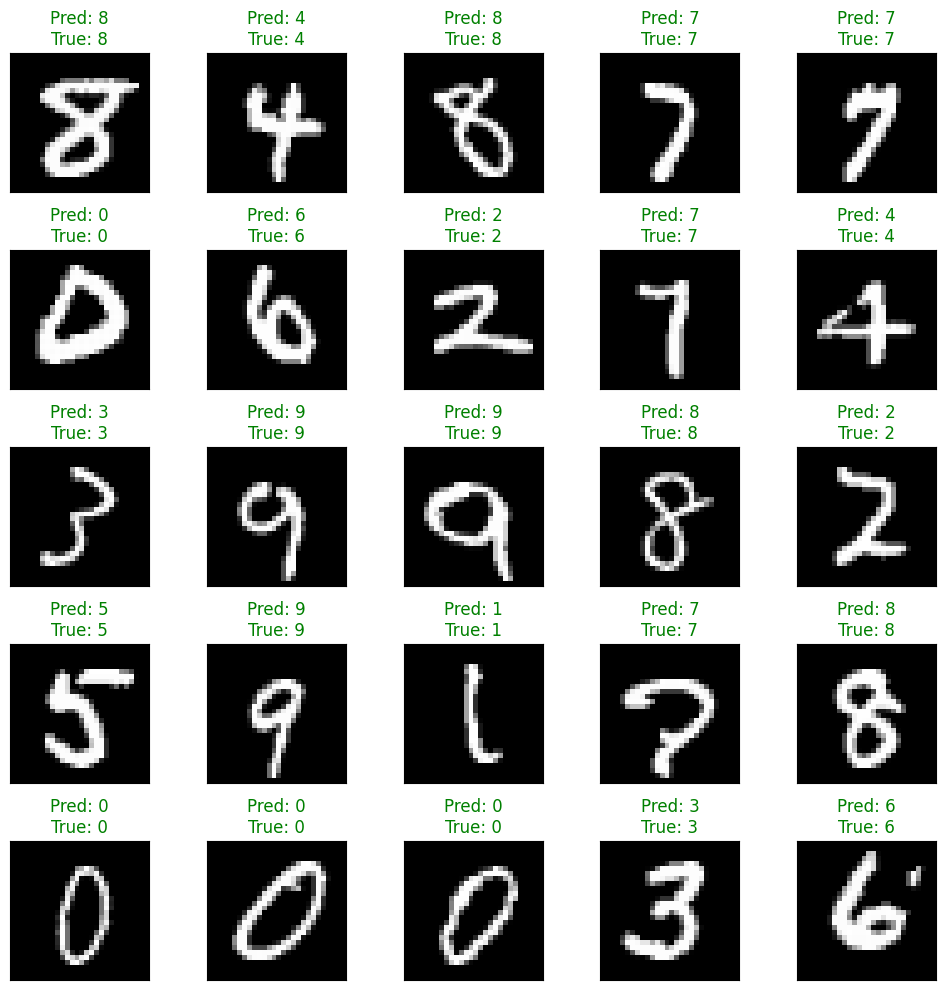

np.float64(97.3)

In [10]:
ann.test(test_loader)

In [11]:
ann.save("ann_model.pkl")

Model saved to models\ann_model.pkl


In [12]:
new_model = ArtificialNeuralNetwork()

In [13]:
new_model.load("ann_model.pkl")

Layer Name: Hidden Layer 0
None
Layer Name: Hidden Layer 1
None
Layer Name: Hidden Layer 2
None
Layer Name: Output Layer
None
Model loaded from models/ann_model.pkl


Test Accuracy: 97.36%, Time: 0.13s


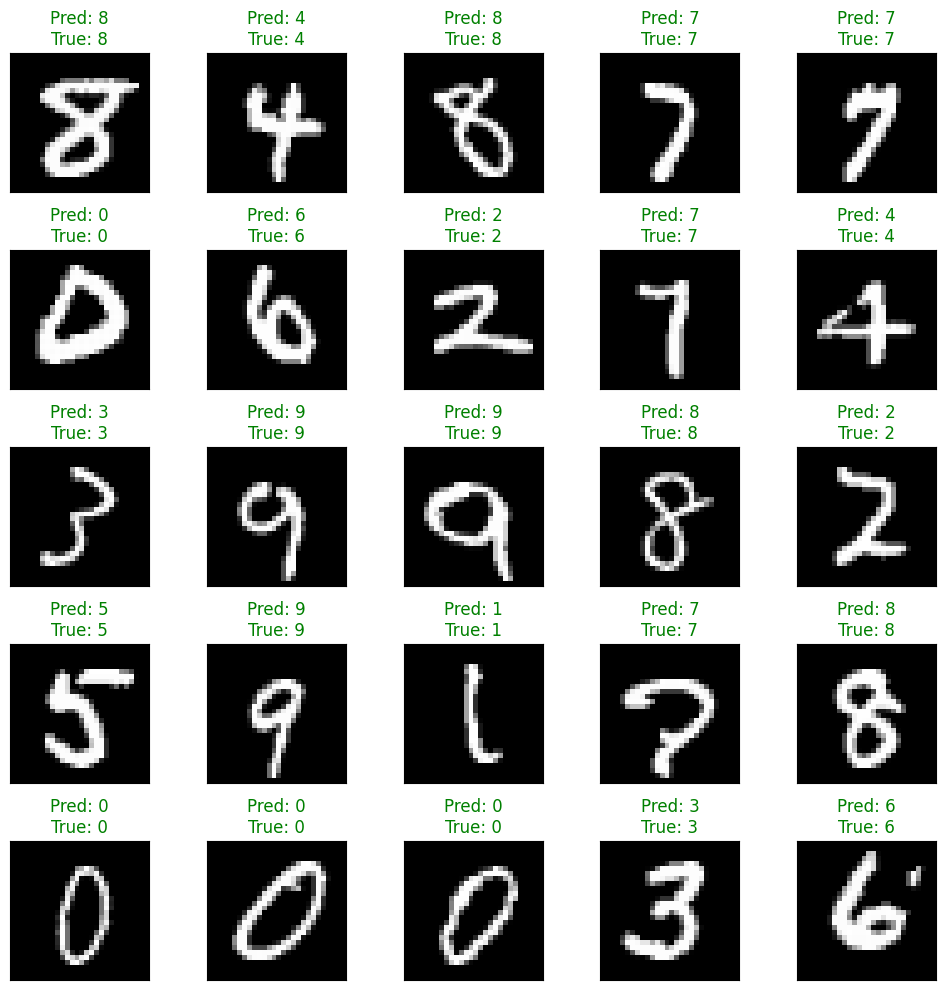

np.float64(97.36428571428571)

In [14]:
new_model.test(test_loader)

In [ ]:
# Compare with MLP

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


model = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    activation='relu',
    solver='sgd',
    max_iter=50,
    batch_size=batch_size,             
    random_state=123,
    verbose= True,
    learning_rate_init= learning_rate,
    learning_rate='constant',
    tol=0.0
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Iteration 1, loss = 1.34060575
Iteration 2, loss = 0.52113243
Iteration 3, loss = 0.39748571
Iteration 4, loss = 0.34862579
Iteration 5, loss = 0.32021683
Iteration 6, loss = 0.29985285
Iteration 7, loss = 0.28382339
Iteration 8, loss = 0.27036860
Iteration 9, loss = 0.25837547
Iteration 10, loss = 0.24777631
Iteration 11, loss = 0.23788150
Iteration 12, loss = 0.22921545
Iteration 13, loss = 0.22032913
Iteration 14, loss = 0.21271524
Iteration 15, loss = 0.20524109
Iteration 16, loss = 0.19833992
Iteration 17, loss = 0.19139470
Iteration 18, loss = 0.18554246
Iteration 19, loss = 0.17961486
Iteration 20, loss = 0.17415077
Iteration 21, loss = 0.16907118
Iteration 22, loss = 0.16422230
Iteration 23, loss = 0.15970101
Iteration 24, loss = 0.15525195
Iteration 25, loss = 0.15121036
Iteration 26, loss = 0.14722284
Iteration 27, loss = 0.14353893
Iteration 28, loss = 0.14003026
Iteration 29, loss = 0.13637764
Iteration 30, loss = 0.13341601
Iteration 31, loss = 0.13024392
Iteration 32, los

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
